In [1]:
import sys, os

sys.path.append("/cr/users/filip/bin/")

from utils.binaries import *
from utils.plotting import *

17:06:55 [INFO] utils          -- ( +1423ms) -- import logging
17:06:55 [INFO] utils.binaries -- (  +352ms) -- import numpy as np
17:06:56 [INFO] utils.binaries -- (  +576ms) -- import pandas as pd
17:06:56 [INFO] utils.binaries -- (    +3ms) -- import binaries.tools as binaries
17:06:56 [INFO] utils.plotting -- (  +598ms) -- import matplotlib.pyplot as plt
17:06:57 [INFO] utils.plotting -- (  +836ms) -- import seaborn as sns
17:06:57 [DBUG] utils.plotting -- (   +25ms) -- font size set to 4
17:06:57 [DBUG] utils.plotting -- (    +1ms) -- figure size set to [2.4, 1.2]
17:06:57 [DBUG] utils.plotting -- (    +1ms) -- plotting style set to `notebook`.
17:06:57 [INFO] utils.plotting -- (    +3ms) -- import plotting.tools as plot


<Axes: >

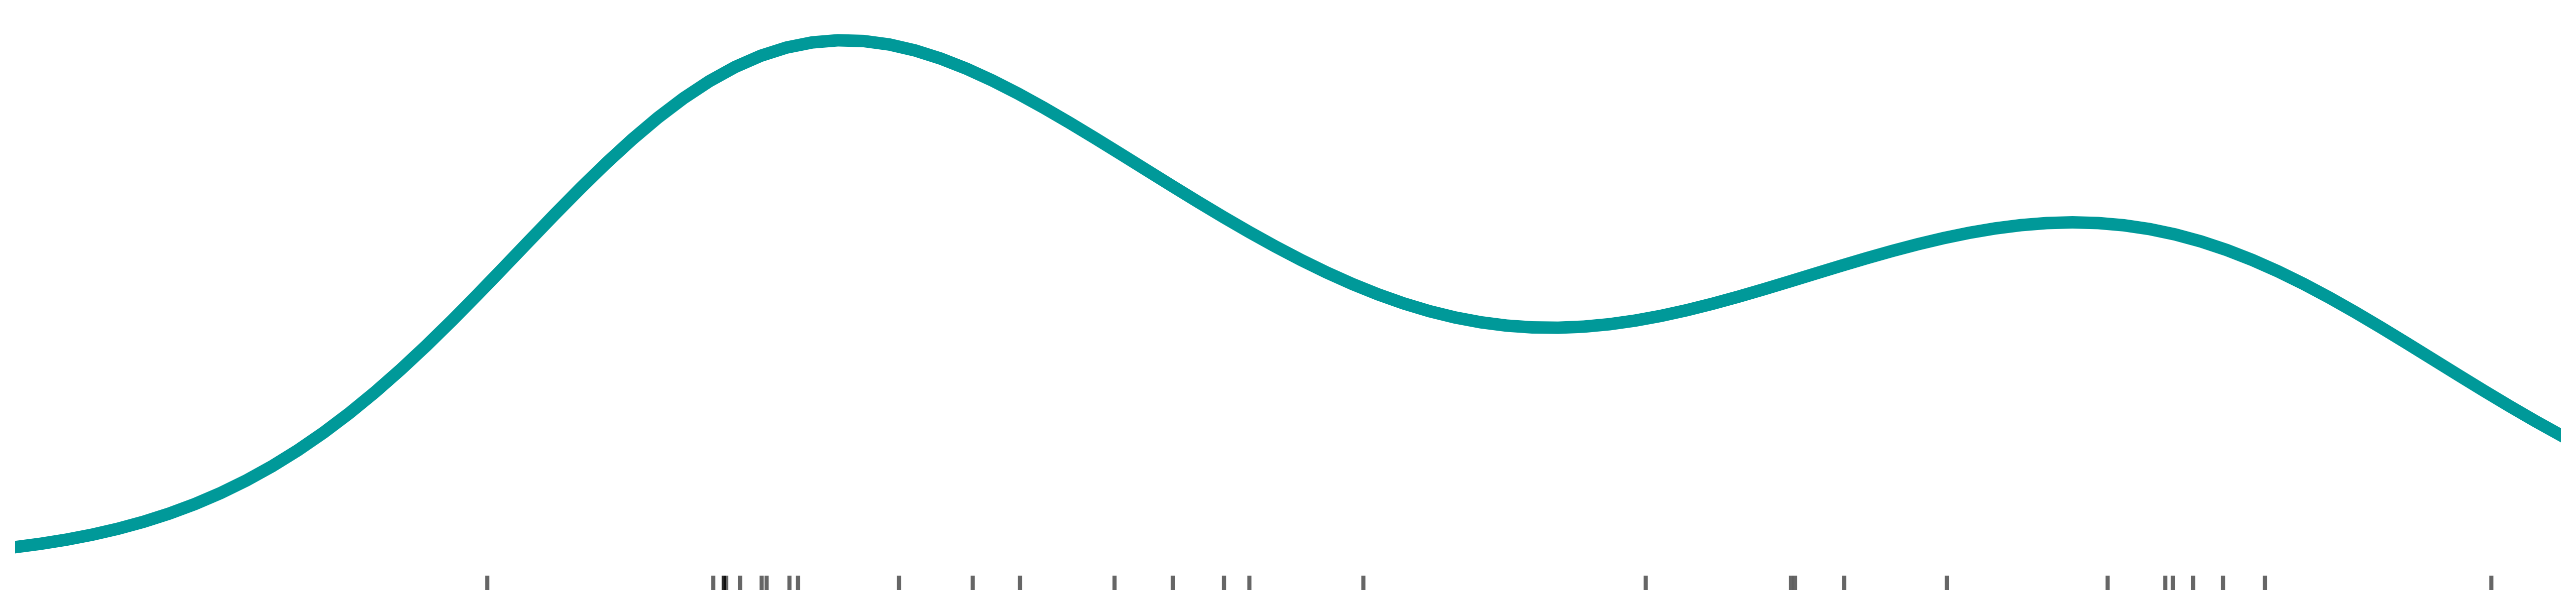

In [53]:
data = np.random.normal(3, 0.3, size=10)
data = np.append(data, np.random.normal(6, 2.1, size=20))


line = tools.kd1d_estimate(data)


X = np.linspace(0, 10, 100)

plt.rcParams["figure.figsize"] = [11, 2.5]
plt.plot(X, line(X), lw=3, c="#009999")
plt.xlim(X[0], X[-1])
plt.ylim(-0.01)
plt.xticks([])
plt.yticks([])
plt.axis("off")
so.rugplot(data, c="k", alpha=0.6)